# Important imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Loading Data and checking 
## Info and Description

In [2]:
df=pd.read_csv('bigmartsales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

## Getting a catogorical value and Numeric for the Data frame

In [6]:
cat=[]
numeri=[]
for x in df.dtypes.index:
    if df[x].dtypes=='object':
        cat.append(x)
    else:
        numeri.append(x)
print(cat)
print(numeri)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit']


In [7]:
for x in cat:
    print(df[x].value_counts())
    print()

FDW13    10
FDG33    10
FDG09     9
FDW26     9
FDW49     9
         ..
FDO33     1
FDE52     1
DRF48     1
FDC23     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium   

# NAN value management 

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

# Item_Weight

In [9]:
Item_Weight=df.pivot_table(values='Item_Weight',index='Item_Identifier',aggfunc='mean',)
Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600000
DRA24,16.125000
DRA59,7.088571
DRB01,4.926667
DRB13,6.115000
...,...
NCZ30,6.590000
NCZ41,19.850000
NCZ42,10.500000


In [10]:
miss_bool=df['Item_Weight'].isnull()


In [11]:
for i,item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in Item_Weight:
            df['Item_Weight'][i]=Item_Weight.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=df['Item_Weight'].mean()
    

C:\Users\Somu\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
m=df['Item_Weight'].mean()
df['Item_Weight']= df['Item_Weight'].replace(0,m)

# Outlet_Size Null value

In [13]:
df['Outlet_Size'].isnull().sum()

2410

In [14]:
Outlet_Size=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
missing=df['Outlet_Size'].isnull()

In [16]:
df.loc[missing,'Outlet_Size']=df.loc[missing,'Outlet_Type'].apply(lambda x: Outlet_Size[x])

# Outlet_Location_Type Null value

In [17]:
df['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64

In [18]:
120+109+67+48+16

360

In [19]:
df['Outlet_Location_Type'].isna().sum()

2050

### Replacement of symbolic values 

In [20]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace({'?':'n','  --':'n','  -':'n','na':'n','NAN':'n'})

In [21]:
Outlet_Location_Type=df.pivot_table(values='Outlet_Location_Type',index=None,columns='Outlet_Size',aggfunc=(lambda x : x.mode()[0]))
Outlet_Location_Type

Outlet_Size,High,Medium,Small
Outlet_Location_Type,Tier 3,Tier 2,Tier1


In [22]:
miss1=df['Outlet_Location_Type'].isna()
miss2=df['Outlet_Location_Type']=='n'

In [23]:
df.loc[miss1,'Outlet_Location_Type']=df.loc[miss1,'Outlet_Size'].apply(lambda x : Outlet_Location_Type[x])

In [24]:
df.loc[miss2,'Outlet_Location_Type']=df.loc[miss2,'Outlet_Size'].apply(lambda x: Outlet_Location_Type[x])

#  Replacement 

In [25]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
df['abbreviations']=df['Item_Identifier'].apply(lambda x: x[:2])
df['abbreviations']=df['abbreviations'].replace({'FD':'Food','DR':'Drinks','NC':'Non-edible'})

# Post clean Data

# VISUALIZATION

# Catogorical 

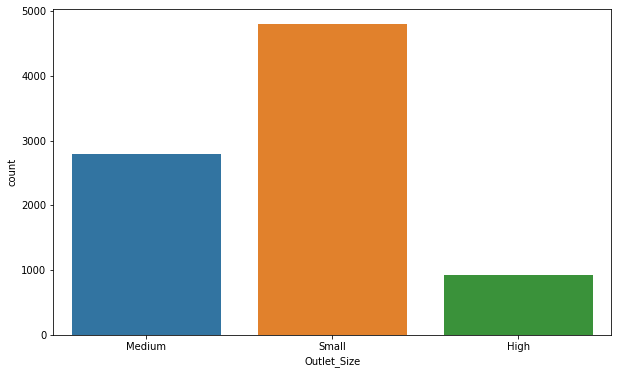

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['Outlet_Size'])

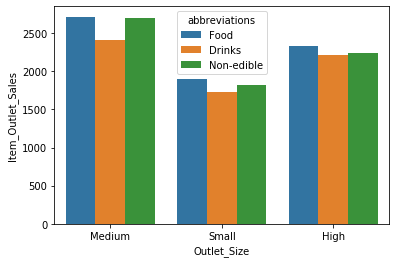

In [46]:
sns.barplot( x='Outlet_Size',y='Item_Outlet_Sales',hue=df.abbreviations,data=df,ci=None)

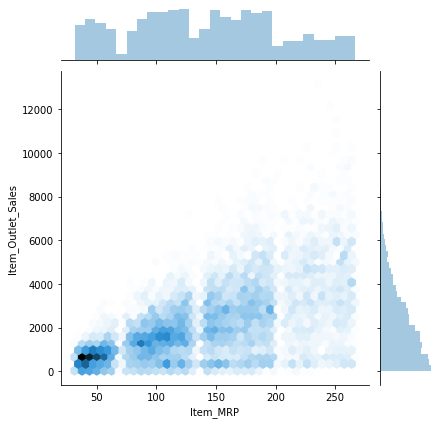

In [28]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,kind='hex',)

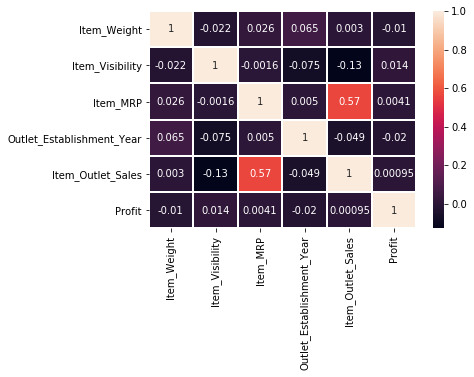

In [32]:
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth=1)

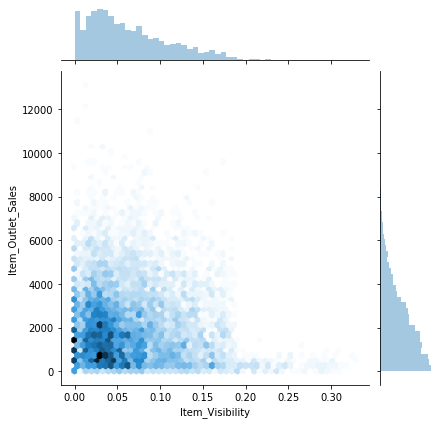

In [36]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,kind='hex',)

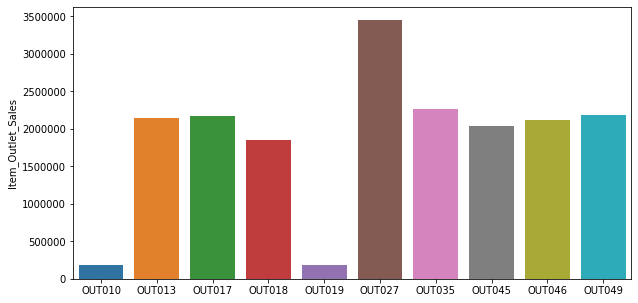

In [52]:
type2=df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
plt.figure(figsize = (10,5))
a=['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049']
a.sort()

charts = sns.barplot(x = a, y = type2)
rotation=45

In [71]:
df[df['Outlet_Identifier']=='OUT027']['Outlet_Size'].value_counts()

Medium    935
Name: Outlet_Size, dtype: int64

In [57]:
fig = go.Figure(data=[go.Pie(labels=['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods'
                                     ,'Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks',
                                     'Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood'] ,
                             values= df2,
                             pull=[0.2, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0.4])])
fig.show()

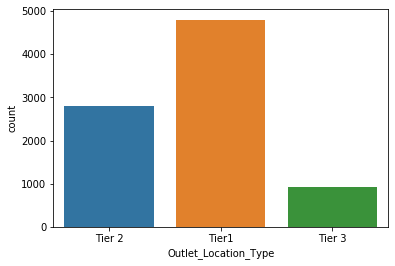

In [33]:
sns.countplot(df['Outlet_Location_Type'])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

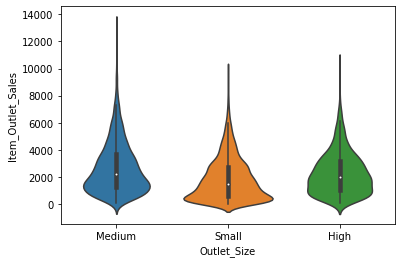

In [34]:
sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)
plt.plot

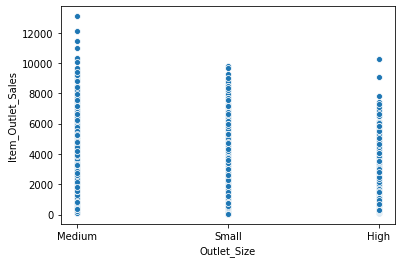

In [35]:
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

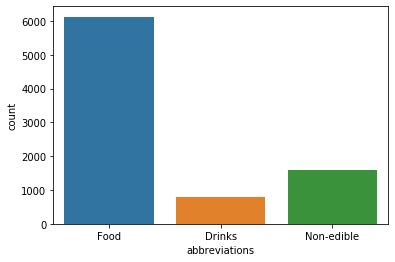

In [37]:
sns.countplot(df['abbreviations'])

# Regression plot

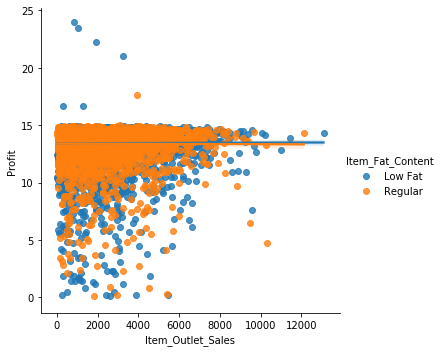

In [38]:
sns.lmplot(x='Item_Outlet_Sales',y='Profit',data=df,hue='Item_Fat_Content')

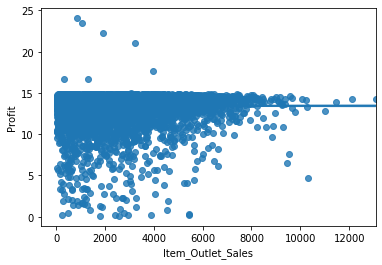

In [39]:
sns.regplot(x='Item_Outlet_Sales',y='Profit',data=df,)

<Figure size 2160x648 with 0 Axes>

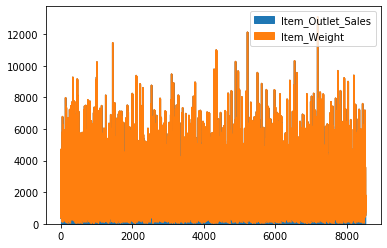

In [40]:
plt.figure(figsize=(30,9))
df[{'Item_Outlet_Sales','Item_Weight'}].plot.area()

In [41]:
print(cat)
print(numeri)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit']


In [53]:
!pip install plotly
import plotly.graph_objects as go

In [55]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

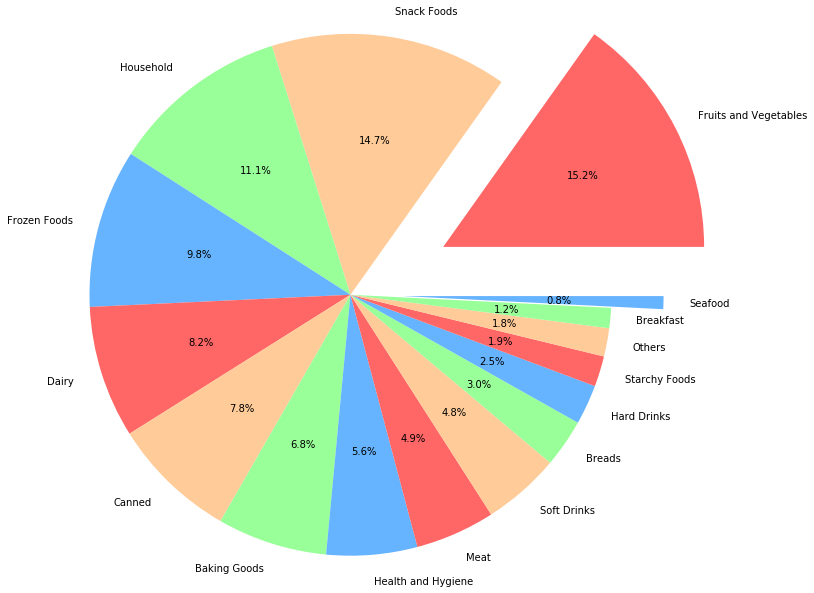

In [56]:
df3=df.groupby(by='Item_Type').sum()              
df2=df3['Item_Outlet_Sales'].sort_values(ascending=False)
plt.rcParams['font.size'] = 10
plt.pie(df2, autopct = '%0.1f%%', radius = 2.0,
        labels = ['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood'],
      explode = [0.8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.4],colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.show()

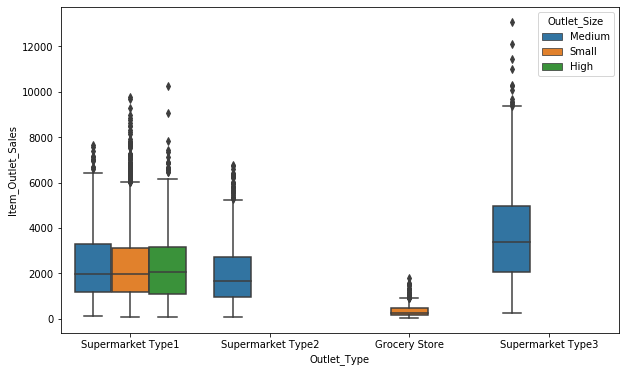

In [72]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df)

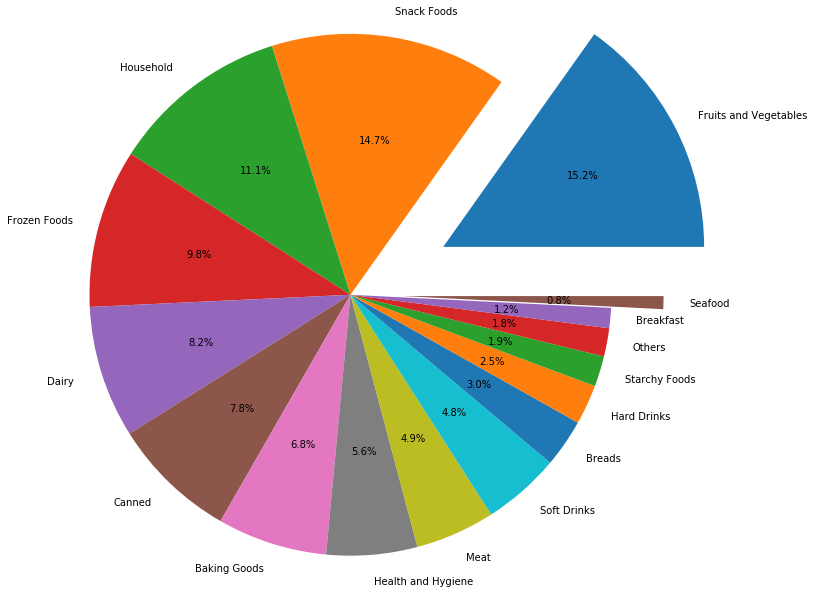

In [73]:
f=df.groupby(by='Item_Type').sum()
e=f['Item_Outlet_Sales'].sort_values(ascending=False)

plt.pie(e,explode = [0.8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.4],autopct='%0.1f%%',radius = 2.0,
          labels=['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 
                  'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks',
                  'Starchy Foods', 'Others','Breakfast','Seafood'])
plt.show()

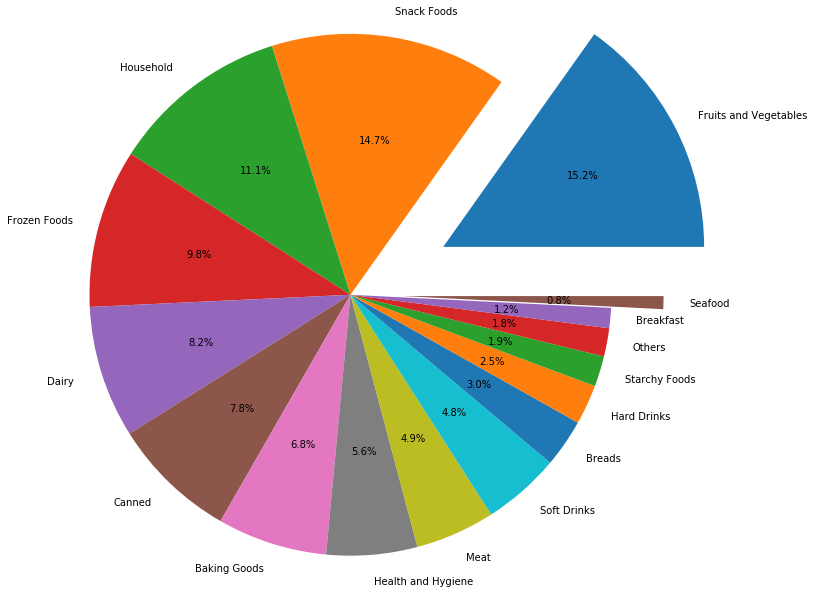

In [74]:
df3=df.groupby(by='Item_Type').sum()              
df2=df3['Item_Outlet_Sales'].sort_values(ascending=False)
plt.rcParams['font.size'] = 10
plt.pie(df2, autopct = '%0.1f%%', radius = 2.0,
        labels = ['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood'],
      explode = [0.8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.4],)
plt.show()

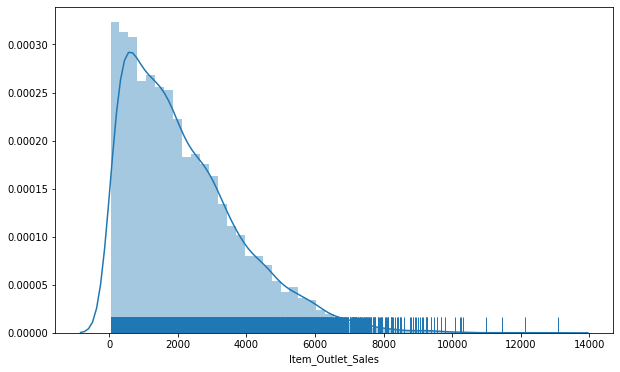

In [79]:
sns.distplot(df['Item_Outlet_Sales'],rug=True)